In [87]:

# Import library

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
# Dir path data

train_dir = './images/images/training'
test_dir = './images/images/test'

In [12]:
# Melakukan load data dan dimasukkan ke dalam variabel train_img dan test_img

def load_img(img_list):
    p = Path(img_list)
    dirs = p.glob('*')
    
    # Penjelasan kode diatas
    # Path(img_list) = Membuat objek Path dengan parameter img_list yaitu path dari image
    # p.glob('*') = Mengambil semua file/folder yang ada pada path tersebut
    
    img_list = []
    
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
    
    # Penjelasan kode diatas
    # str(dir).split('/')[1] = Mengambil nama folder dari path tersebut
    # dir.glob('*.jpg') = Mengambil semua file yang berekstensi jpg pada folder tersebut
    # mpimg.imread(file) = Membaca file tersebut dan dimasukkan ke dalam variabel img
            
            if not img is None:
                img_list.append((img, label))
    
    # Penjelasan kode diatas
    # img_list.append((img, label)) = Memasukkan img dan label ke dalam list img_list
    
    return img_list

In [13]:
# Melakukan load data train dan test

train_img_list = load_img(train_dir)
test_img_list = load_img(test_dir)

(array([[[173, 181, 184],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [146, 154, 157],
         [149, 157, 160],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        [[172, 180, 183],
         [145, 153, 156],
         [148, 156, 159],
         ...,
         [162, 170, 173],
         [162, 170, 173],
         [162, 170, 173]],
 
        ...,
 
        [[ 42,  42,  34],
         [ 29,  29,  21],
         [ 23,  23,  15],
         ...,
         [ 33,  28,  24],
         [ 35,  30,  26],
         [ 36,  31,  27]],
 
        [[ 45,  45,  37],
         [ 32,  32,  24],
         [ 24,  24,  16],
         ...,
         [ 31,  26,  22],
         [ 33,  28,  24],
         [ 35,  30,  26]],
 
        [[ 48,  48,  40],
         [ 34,  34,  26],
         [ 25,  25,  17],
         ...,
         [ 29,  24,  20],
  

In [14]:
# Function untuk melakukan visualisasi image secara random

def random_img_vis(img):
    rand_num = np.random.randint(0, len(img))
    
    img_rand = img[rand_num][0]
    
    plt.imshow(img_rand)
    print(f'SHape: {img_rand.shape}')
    print('Label: ', img[rand_num][1])

# Penjelasan kode diatas
# np.random.randint(0, len(img)) = Mengambil random index dari image
# img[rand_num][0] = Mengambil image tersebut berdasarkan index yang sudah di random
# plt.imshow(img_rand) = Menampilkan image tersebut yang sudah dipiulih secara random
# print(f'Shape: {img_rand.shape}') = Menampilkan shape dari image tersebut
# print('Label: ', img[rand_num][1]) = Menampilkan label dari image tersebut

SHape: (700, 1280, 3)
Label:  day


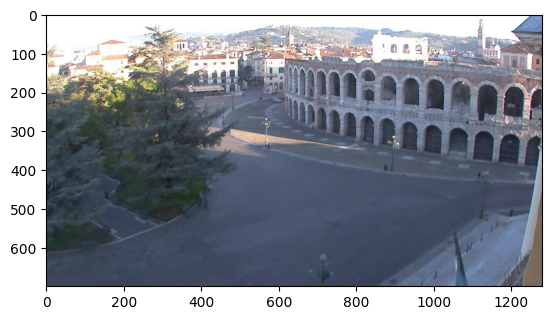

In [21]:
# Menampilkan image secara random
random_img_vis(train_img_list)

# Pre-process image

In [23]:
# Function untuk melakukan standarisasi terhadap ukuran image

def standardize_img(img):
    standardized_img = cv.resize(img, (1100, 600))
    
    return standardized_img

In [24]:
# Function untuk melakukan encoding terhadap label day dan night

def label_encoder(label):
    if label == 'day':
        return 1
    else:
        return 0

In [25]:
# Function untuk melakukan preprocessing terhadap image

def preprocess_img(img_list):
    img_list_preprocessed = []
    
    for item in img_list:
        img = item[0]
        label = item[1]
        
        img_standardized = standardize_img(img)
        encoded_label = label_encoder(label)
        
        img_list_preprocessed.append((img_standardized, encoded_label))
    
    # Penjelasan kode diatas
    # Function akan mengambil data image kemudian dilakukan perulangan untuk mengambil data per image.
    # Kemudian data per image tersebut dimasukkan ke dalam array bernama item yang dimana untuk melakukan ekstraksi 
    # data img dan label. Kemudian dilakukan standarisasi dan encoding label terhadap image dengan memanggil 
    # function standardize_img dan label_encoder. Setelah dilakukan standarisasi dan label encode
    # data tersebut akan dimasukkan ke dalam array img_list_preprocessed

    return img_list_preprocessed

In [28]:
train_std_img_list = preprocess_img(train_img_list)

SHape: (600, 1100, 3)
Label:  0


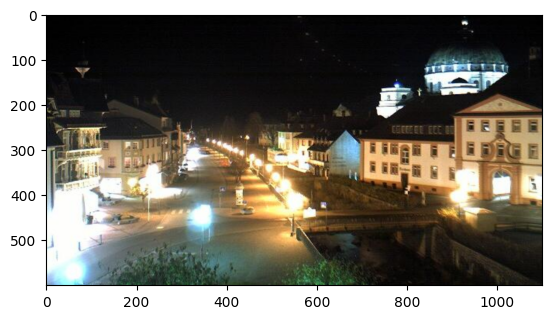

In [37]:
# Melakukan pengecekan image yang sudah dilakukan standarisasi

random_img_vis(train_std_img_list)

# Extract Feature

In [61]:
# Function untuk melakukan ekstraksi fitur pada image menjadi sebuah histogram

def extract_hist(img_list):
    histogram_img_list = []
    
    for img in img_list:
        img_data = img[0]
        img_label = img[1]
        equalized_img = exposure.equalize_hist(img_data)
        hist, _ = np.histogram(equalized_img, 256, [0, 256])
        
        histogram_img_list.append((hist, img_label))
    
    return histogram_img_list

# Penjelasan kode diatas
# Function akan mengambil data image kemudian dilakukan perulangan untuk mengambil data per image.
# Kemudian data per image tersebut dimasukkan ke dalam array bernama img yang dimana untuk melakukan ekstraksi
# data img. Kemudian dilakukan normalisasi terhadap image dengan menggunakan exposure.equalize_hist dan dilakukan
# pembuatan histogram untuk image yang sudah dilakukan normalisasi
# Setelah dilakukan ekstraksi fitur, data tersebut akan dimasukkan ke dalam array histogram_img_list

In [62]:
# Melakukan ekstraksi fitur histogram pada image train

train_hist_list = extract_hist(train_std_img_list)

/home/gin_arata/Documents/Kuliah/Semester 5/Machine Learning/machine-learning-kuliah/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


In [78]:
# Memisahkan data histogram dan label ke dalam X dan y
X_train = [hist for hist, _ in train_hist_list]
y_train = [label for _, label in train_hist_list]

print("X (data histogram):", X_train[:2])  # Menampilkan 2 histogram pertama untuk contoh
print("y (label):", y_train)

X (data histogram): [array([1979999,       1,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,

In [83]:
# Melakukan Normalisasi data histogram

def standardize_hist(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

In [85]:
# Melakukan training menggunakan SVC

X_train = standardize_hist(X_train)

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

SVC(kernel='linear')

# Testing Model

In [94]:
# Melakukan standarisasi image dan ekstraksi fitur histogram pada image test

test_std_img_list = preprocess_img(test_img_list)

test_hist_list = extract_hist(test_std_img_list)

X_test = [hist for hist, _ in test_hist_list]
y_test = [label for _, label in test_hist_list]

X_test = standardize_hist(X_test)

/home/gin_arata/Documents/Kuliah/Semester 5/Machine Learning/machine-learning-kuliah/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [93]:
# Melakukan predict model dan menghitung akurasi pada model

y_pred = clf.predict(X_test)

print(f'Accuracy Model: {accuracy_score(y_test, y_pred)}')

Accuracy Model: 0.5875
